Your first task is parsing. As this is the first assignment and as the parsers are very different for the two datasets (images vs. text), you may use any library/package to aid in the parsing here, however you are encouraged to write your own.

In [1]:
#FIRST: PARSING
%pip install scikit-learn
%pip install torch
%pip install torchvision
import sklearn
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
# Parse the MNIST dataset
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=torchvision.transforms.ToTensor())
# print(mnist_train)
# print(mnist_test)

# convert to numpy, tensor to numpy
train_images = mnist_train.data.numpy().astype(np.float64)
train_labels = mnist_train.targets.numpy()
print(train_images.shape, train_labels.shape)

test_images = mnist_test.data.numpy().astype(np.float64) 
test_labels = mnist_test.targets.numpy()
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

Text(0.5, 1.0, 'Label: 5')

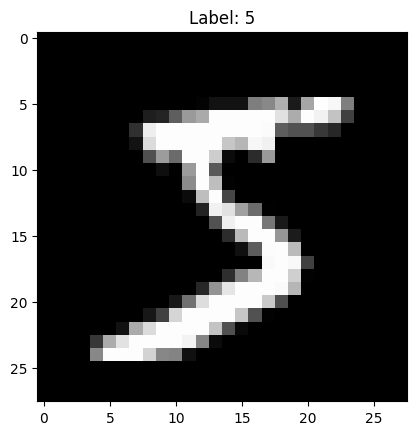

In [72]:
# VISUALIZATION:
print(train_images[0])
print(type(train_images[0]))
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")

In [73]:
%pip install tqdm
from tqdm import tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:
# SECOND TASK: normalization

# 1. Shift and scale normalization:
    # Subtract the minimum, then divide by new maximum
    # This will shift the minimum to 0 and the maximum to 1
# 3. Term-Frequency (TF) weighting:
    # Map each term in a document with its frequency (text only), up to me to determine appropriate normalization

# MNIST Dataset: 
    # Make sure any value transformation retains the 0 values
    # <0, 255> -> <0, 1> essentially black and white

# 1. Shift and scale normalization:
    # Subtract the minimum, then divide by new maximum
    # This will shift the minimum to 0 and the maximum to 1
shift_scale_train_images = train_images / 255.0

# for image in tqdm(shift_scale_train_images):
#     for col in image:
#         for pixel in col:
#             pixel = (pixel - 0.0) / (255.0 - 0.0)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Text(0.5, 1.0, 'Label: 5')

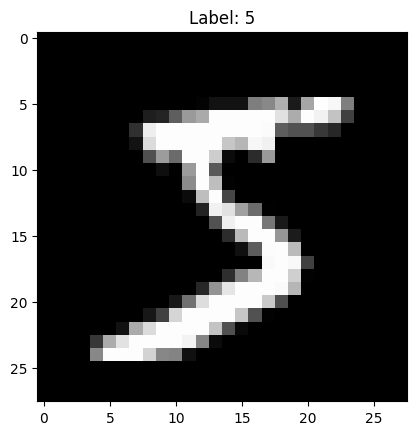

In [75]:
# Visualize the first image after normalization:
print(shift_scale_train_images[0])
print(type(shift_scale_train_images[0]))
plt.imshow(shift_scale_train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")

In [76]:
# 2. Zero mean, unit variance
    # Subtract the mean, divide by the appropriate value to get variance = 1
mean = np.mean(train_images, axis=0)
print(mean.shape)
std = np.std(train_images, axis=0)
print(std.shape)
zero_mean_unit_variance_train_images = (train_images - mean) / std
# replace nan with 0
zero_mean_unit_variance_train_images = np.nan_to_num(zero_mean_unit_variance_train_images)

(28, 28)
(28, 28)


C:\Users\koola\AppData\Local\Temp\ipykernel_19760\2750537632.py:7: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_train_images = (train_images - mean) / std


In [77]:
# Zero mean from class notes:

# mew = np.sum(train_images, axis=0) / train_images.shape[0]
print(train_images[0][6])
print(np.mean(train_images[0][6]))

[  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.]
103.57142857142857


In [78]:
print(mean) # Mean = pixel value for that specific spot across all images

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.10000000e-03 7.83333333e-03 3.60000000e-03 1.50000000e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.66666667e-04 9.16666667e-04 9.28333333e-03 2.42833333e-02
  4.37166667e-02 6.41000000e-02 1.20133333e-01 1.60733333e-01
  1.74183333e-01 1.77433333e-01 1.89316667e-01 1.74150000e-01
  1.86933333e-01 1.53650000e-01 1.00116667e-01 7.12333333e-02
  5.38166667e-02 2.13666667e-02 1.00833333e-02 3.53333333e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.06666667e-03 7.00000000e-04
  6.95000000e-03 5.48333333e-03 4.71000000e-02 1.38400000e-01
  2.64

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
  -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
  -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
  -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
  -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.39534598e-03
  -8.522

Text(0.5, 1.0, 'Label: 5')

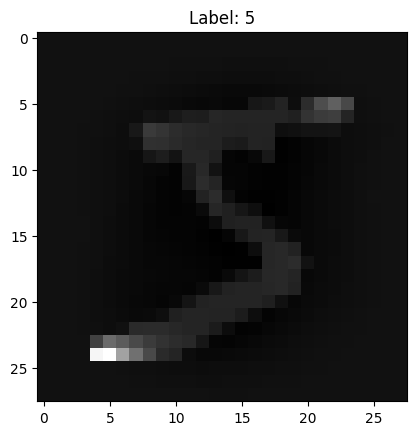

In [79]:
# Visualize:
print(zero_mean_unit_variance_train_images[0])
print(np.var(zero_mean_unit_variance_train_images[0])) # Should be close to 1
plt.imshow(zero_mean_unit_variance_train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")



In [80]:
# Pairwise similarities metrics:

# 1. Euclidean distance(required, library)
    # a. required(your own, use batches)

# 2. Edit distance(required for text) OR cosine similarity(required for vectors)




In [81]:
# 1. Euclidean distance (library)

euclidean_distance = np.linalg.norm(train_images[0] - train_images[11])
#check:
    # zero_mean_unit_variance_train_images[0] - zero_mean_unit_variance_train_images[1])
    # shift_scale_train_images[0] - shift_scale_train_images[1])

print(euclidean_distance)
print(type(euclidean_distance))

print(train_labels[0]) # 5
print(train_labels[11]) # 5

print("\n")

for i in range(12):
    print(train_labels[i]) # 5, 0, 4, 1, 9, 2, 1, 3, 1, 4, ...
# The distance between 5 and 0 is: 2387.111


distances = []
for i in range(len(shift_scale_train_images)):
    distances.append(np.linalg.norm(shift_scale_train_images[0] - shift_scale_train_images[i]))


2867.4593283950862
<class 'numpy.float64'>
5
5


5
0
4
1
9
2
1
3
1
4
3
5


In [82]:
# try with normalized:
SS_euclidean_distance = np.linalg.norm(shift_scale_train_images[0] - shift_scale_train_images[10])
print(SS_euclidean_distance)

8.391501715310692


In [83]:
ZM_euclidean_distance = np.linalg.norm(zero_mean_unit_variance_train_images[0] - zero_mean_unit_variance_train_images[11])
print(ZM_euclidean_distance)

41.07952550854942


In [84]:
# I will be using the shift and scale normalization for the rest of the tasks: 

distances = []
for i in range(len(shift_scale_train_images)):
    distances.append(np.linalg.norm(shift_scale_train_images[0] - shift_scale_train_images[i]))

In [85]:
print(distances[:10]) # first 10 distances

[np.float64(0.0), np.float64(9.361222132577327), np.float64(10.875094558710726), np.float64(10.018901014936581), np.float64(10.480263577046502), np.float64(10.126636833057416), np.float64(9.50428139627975), np.float64(8.509666575199573), np.float64(9.3143710818562), np.float64(10.07571719003181)]


In [86]:
# zip together labels and distances
predictions = list(zip(train_labels, distances))

# create a function to get the top k predictions
def get_top_k_predictions(k, predictions):
    return sorted(predictions, key=lambda x: x[1])[:k]

def print_pred(predictions):
    for label, distance in predictions:
        print(f"Label: {label}, Distance: {distance}")

print_pred(get_top_k_predictions(20, predictions)) # top 5 predictions

# Create a final prediction that is the most common label among the top k predictions
def final_prediction(k, predictions):
    top_k = get_top_k_predictions(k, predictions)
    labels = [label for label, distance in top_k]
    return max(set(labels), key=labels.count)

print(final_prediction(20, predictions)) # final prediction for k=5


Label: 5, Distance: 0.0
Label: 5, Distance: 6.123421106197849
Label: 5, Distance: 6.241574097341995
Label: 5, Distance: 6.253800382437516
Label: 3, Distance: 6.261605603114141
Label: 5, Distance: 6.2919488047527965
Label: 5, Distance: 6.293676607845121
Label: 5, Distance: 6.29689878083294
Label: 5, Distance: 6.31252698404212
Label: 5, Distance: 6.3282538970573015
Label: 5, Distance: 6.468091021389275
Label: 5, Distance: 6.486331412605749
Label: 5, Distance: 6.49174911813767
Label: 5, Distance: 6.530390317063363
Label: 5, Distance: 6.547765525107026
Label: 5, Distance: 6.59808320936299
Label: 5, Distance: 6.603753898481597
Label: 3, Distance: 6.6060135943987435
Label: 3, Distance: 6.626704912177665
Label: 5, Distance: 6.634280041175857
5


In [87]:
# Now lets test it on random images from the test set

# Get a random image from the test set
random_index = np.random.randint(0, len(test_images))
random_image = test_images[random_index]

# Normalize the random image
normalized_random_image = random_image / 255.0

# Calculate distances from the random image to all training images
test_distances = []
for i in range(len(shift_scale_train_images)):
    test_distances.append(np.linalg.norm(normalized_random_image - shift_scale_train_images[i]))

print_pred(get_top_k_predictions(20, list(zip(train_labels, test_distances))))
# Final prediction for the random image
print("Predicted: ", final_prediction(20, list(zip(train_labels, test_distances))))
print("Actual: ", test_labels[random_index]) # actual label of the random image


Label: 5, Distance: 4.784207649097277
Label: 5, Distance: 4.8210642513024515
Label: 5, Distance: 4.838095335401413
Label: 5, Distance: 4.88172607992456
Label: 5, Distance: 4.927082295453827
Label: 5, Distance: 5.010351453138562
Label: 5, Distance: 5.180555429289414
Label: 5, Distance: 5.213051081307069
Label: 5, Distance: 5.229739287037225
Label: 5, Distance: 5.2521312566813
Label: 5, Distance: 5.285030690930315
Label: 5, Distance: 5.311166448406215
Label: 5, Distance: 5.322644999297142
Label: 5, Distance: 5.343846328197746
Label: 5, Distance: 5.346332198232374
Label: 5, Distance: 5.406567552783061
Label: 5, Distance: 5.428570098834005
Label: 5, Distance: 5.439947927018565
Label: 5, Distance: 5.499118799772377
Label: 5, Distance: 5.519058587236618
Predicted:  5
Actual:  5


In [88]:
zero_mean_unit_variance_train_images = np.nan_to_num((train_images - mean) / std)
zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)

print(zero_mean_unit_variance_train_images.shape)
print(zero_mean_unit_variance_train_images[0])

C:\Users\koola\AppData\Local\Temp\ipykernel_19760\2834081449.py:1: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_train_images = np.nan_to_num((train_images - mean) / std)


(60000, 28, 28)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
  -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
  -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
  -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
  -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.39534

C:\Users\koola\AppData\Local\Temp\ipykernel_19760\2834081449.py:2: RuntimeWarning: divide by zero encountered in divide
  zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)
C:\Users\koola\AppData\Local\Temp\ipykernel_19760\2834081449.py:2: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)


In [89]:
# 1a. Euclidean distance (your own)

# zero_mean_unit_variance_train_images = np.nan_to_num((train_images - mean) / std)
# zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)

# print(zero_mean_unit_variance_train_images.shape)
# # convert nan to 0
# # zero_mean_unit_variance_train_images = np.nan_to_num(zero_mean_unit_variance_train_images)
# # zero_mean_unit_variance_test_images = np.nan_to_num(zero_mean_unit_variance_test_images)
# # subtract between test data and each row of training data -> power by 2 -> sum along axis you want to eliminate -> sqrt

# selfimplemented_euclidean_distances = []

# for i in tqdm(range(len(zero_mean_unit_variance_train_images))):
#     distances = []
#     for j in range(len(zero_mean_unit_variance_train_images)):
#         distance = np.sqrt(np.sum((zero_mean_unit_variance_train_images[i] - zero_mean_unit_variance_train_images[j]) ** 2))
#         distances.append(distance)
#     selfimplemented_euclidean_distances.append(distances)

# for i in tqdm(range(len(zero_mean_unit_variance_test_images))):
#     distances = []
#     for j in range(len(zero_mean_unit_variance_train_images)):
#         distance = np.sqrt(np.sum((zero_mean_unit_variance_test_images[i] - zero_mean_unit_variance_train_images[j]) ** 2))
#         distances.append(distance)
#     selfimplemented_euclidean_distances.append(distances)
# print(len(selfimplemented_euclidean_distances))
# sorted_selfimplemented_euclidean_distances = sorted(selfimplemented_euclidean_distances, key=lambda x: x[0])
# print(sorted_selfimplemented_euclidean_distances[:5])



In [120]:
#implement a knn classifier for the MNIST dataset
class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.train_images = None
        self.train_labels = None


    def fit(self, train_images, train_labels, norm):
        #self.train_images = train_images
        self.train_labels = train_labels
        if norm == "Shift and Scale":
            self.train_images = train_images / 255.0
            self.train_images = np.nan_to_num(self.train_images)

        if norm == "Zero Mean Unit Variance":
            self.train_images = (self.train_images - np.mean(self.train_images, axis=0)) / np.std(self.train_images, axis=0)

    def predict_library(self, test_image): #uses numpy library euclidean distance
        distances = np.linalg.norm(self.train_images - test_image, axis=1)
        top_k_indices = np.argsort(distances)[:self.k]
        top_k_labels = self.train_labels[top_k_indices]
        most_common = np.bincount(top_k_labels).argmax()
        return most_common
    
    def predict_own(self, test_image):
        distances = []
        
        for i in range(len(train_images)):
            distance = np.sqrt(np.sum((test_image - self.train_images[i]) ** 2))
            distances.append((distance, self.train_labels[i]))

        #print out the distances and their respective labels after sorting

        distances = sorted(distances, key=lambda x: x[0])

        print("Distances: ", distances[:self.k], "Labels: ", [label for _, label in distances[:self.k]])
        most_common = 



        # print("Distances: ", distances, "Labels: ", self.train_labels[:self.k])
        # most_common = np.bincount(self.train_labels[:self.k]).argmax()

        

        # top_k_indices = np.argsort(distances)[:self.k]
        #print out the k distances
        # print("Top k indices: ", top_k_indices)
        #print out their distances
        # print("Top k distances: ", distances[top_k_indices])
        # top_k_labels = self.train_labels[top_k_indices]
        # print("Top k labels: ",top_k_labels)
        # most_common = np.bincount(top_k_labels).argmax()
        #print("Most Common: ", most_common)
        return most_common
    
    def euclidean_distance(self, test_image):
        distance = np.sqrt(np.sum((test_image - self.train_images[i]) ** 2))
        return distance
    


In [93]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [119]:
# Test the KNN classifier

knn = KNNClassifier(k = 12)
knn.fit(train_images, train_labels, norm="Shift and Scale")

# lets shrink the test size
test_images_reduced = test_images[:1000]

# remember to normalize test set as well
test_images_reduced = test_images_reduced / 255.0

test_labels_reduced = test_labels[:1000]

correct = 0
accuracy = 0.0
accuracies = []
# test on first 10 images:
for i in tqdm(range(len(test_images_reduced))):
    prediction = knn.predict_own(test_images_reduced[i])
    print(f"Predicted: {prediction}, Actual: {test_labels_reduced[i]}")
    # prediction = knn.predict_library(test_images[i])
    # acc = accuracy_score(test_labels[i], prediction)
    # accuracies.append(accuracy)\\
    # print(f"Predicted: {prediction}, Actual: {test_labels[i]}, Accuracy: {acc}")

    if prediction == test_labels_reduced[i]:
        correct += 1
    accuracy = correct / (float(i) + 1)

# knn.predict_library(test_images[0])



  0%|          | 1/1000 [00:00<08:33,  1.95it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 7


  0%|          | 2/1000 [00:01<08:27,  1.97it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 2


  0%|          | 3/1000 [00:01<08:16,  2.01it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 1


  0%|          | 4/1000 [00:01<08:13,  2.02it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 0


  0%|          | 5/1000 [00:02<08:09,  2.03it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 4


  1%|          | 6/1000 [00:02<08:07,  2.04it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 1


  1%|          | 7/1000 [00:03<08:07,  2.04it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 4


  1%|          | 8/1000 [00:03<08:05,  2.04it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 9


  1%|          | 9/1000 [00:04<08:03,  2.05it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 5


  1%|          | 10/1000 [00:04<08:06,  2.04it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 9


  1%|          | 11/1000 [00:05<08:04,  2.04it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 0


  1%|          | 12/1000 [00:05<08:06,  2.03it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 6


  1%|▏         | 13/1000 [00:06<08:03,  2.04it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 9


  1%|▏         | 14/1000 [00:06<08:02,  2.04it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 0


  2%|▏         | 15/1000 [00:07<08:01,  2.05it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 1


  2%|▏         | 16/1000 [00:07<08:00,  2.05it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 5


  2%|▏         | 17/1000 [00:08<07:59,  2.05it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 9


  2%|▏         | 18/1000 [00:08<08:01,  2.04it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 7


  2%|▏         | 19/1000 [00:09<07:59,  2.05it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 3


  2%|▏         | 20/1000 [00:09<07:59,  2.04it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 4


  2%|▏         | 21/1000 [00:10<08:03,  2.03it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 9


  2%|▏         | 22/1000 [00:10<08:05,  2.01it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 6


  2%|▏         | 23/1000 [00:11<08:05,  2.01it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 6


  2%|▏         | 24/1000 [00:11<08:04,  2.01it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 5


  2%|▎         | 25/1000 [00:12<08:04,  2.01it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 4


  3%|▎         | 26/1000 [00:12<08:08,  1.99it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 0


  3%|▎         | 27/1000 [00:13<08:03,  2.01it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 7


  3%|▎         | 28/1000 [00:13<08:04,  2.01it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 4


  3%|▎         | 29/1000 [00:14<08:02,  2.01it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 0


  3%|▎         | 30/1000 [00:14<08:17,  1.95it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 1


  3%|▎         | 31/1000 [00:15<08:12,  1.97it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 3


  3%|▎         | 32/1000 [00:15<08:22,  1.93it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 1


  3%|▎         | 33/1000 [00:16<08:22,  1.93it/s]

[]
[]
Distances:  [] Labels:  [5 0 4 1 9 2 1 3 1 4 3 5]
Predicted: 1, Actual: 3


  3%|▎         | 33/1000 [00:16<08:07,  1.98it/s]


KeyboardInterrupt: 

In [101]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Correct: {correct}/{len(test_images_reduced)}")
print(f"Incorrect: {len(test_images_reduced) - correct}/{len(test_images_reduced)}")


Accuracy: 12.60%
Correct: 126/1000
Incorrect: 874/1000


7


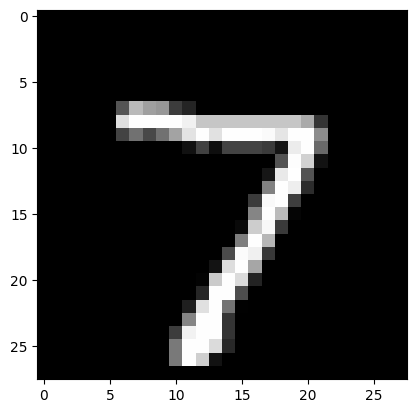

In [103]:
plt.imshow(test_images_reduced[0], cmap='gray')
print(test_labels_reduced[0])

# 20 NEWS GROUP:

In [10]:
# FIRST TASK: Parse the 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# label names
print(newsgroups_train.target_names)
# example of a document's data
print(newsgroups_train.data[0])
# this example document's target label
print(newsgroups_train.target[0])
print(newsgroups_train.target_names[newsgroups_train.target[0]])

# number of documents in the training and test sets
print(len(newsgroups_train.data))
print(len(newsgroups_test.data))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have o

In [ ]:
# SECOND TASK: TF-IDF Vectorization
    # Term Frequency: How often a word appears in the document
    # Inverse document frequency: How often a word appears in the entire corpus

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
print(X_train.shape)
print(X_test.shape)

print(X_train[0])


(11314, 130107)
(7532, 130107)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 89 stored elements and shape (1, 130107)>
  Coords	Values
  (0, 56979)	0.0574701540748513
  (0, 75358)	0.3538350134970617
  (0, 123162)	0.25970902457356887
  (0, 118280)	0.21186807208281694
  (0, 50527)	0.05461428658858725
  (0, 124031)	0.10798795154169123
  (0, 85354)	0.03696978508816317
  (0, 114688)	0.06214070986309587
  (0, 111322)	0.019156718024950434
  (0, 123984)	0.036854292634593756
  (0, 37780)	0.3813389125949312
  (0, 68532)	0.07325812342131598
  (0, 114731)	0.1444727551278406
  (0, 87620)	0.0356718631408158
  (0, 95162)	0.03447138409326312
  (0, 64095)	0.035420924271313554
  (0, 98949)	0.16068606055394935
  (0, 90379)	0.01992885995664587
  (0, 118983)	0.03708597805061915
  (0, 89362)	0.06521174306303765
  (0, 79666)	0.10936401252414275
  (0, 40998)	0.07801368196918111
  (0, 92081)	0.09913274493911224
  (0, 76032)	0.01921946305222309
  (0, 4605)	0.06332603952480324
  :	:
  (0, 37565)	

In [11]:
# 2. Cosine Similarity (required for vectors)

from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between the first two documents in the training set
cosine_sim = cosine_similarity(X_train[0], X_train[1])
print(cosine_sim)

# create a function for cosine similarity of two documents:
def cosine_similarity_docs(doc1, doc2):
    return cosine_similarity(doc1, doc2)



[[0.04405974]]
